# Implementation of K-Mean Clustering Algorithm with 2D examples

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Generate the points

In [19]:
mean = []
mean.append(np.array([1,-1]))
mean.append(np.array([-1,1]))
mean.append(np.array([1,1]))
mean.append(np.array([-1,-1]))

cov = np.array([[0.1,0],[0,0.1]])

In [27]:
X = np.concatenate([np.random.multivariate_normal(m, cov, 100) for m in mean])

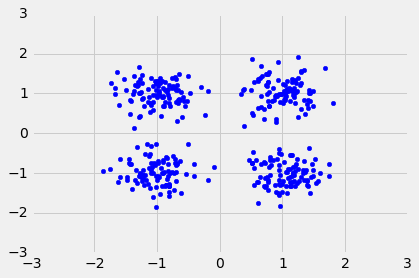

In [31]:
plt.axis([-3,3,-3,3])
plt.scatter(X[:,0], X[:,1], color="blue")

## Find the means

The algorithm consists in choosing K random points as means, and until convergence (i.e. the means don't change any longer) :
* we find the nearest mean to each point (so that each point belong to a cluster)
* we compute the real mean of each cluster : they are the new guessed means

### Useful functions

In [146]:
def nearest_mean(point, means):
    return np.argmin([np.linalg.norm(point - m) for m in means]) # return the index of the mean in "means" array

### Initialization

In [281]:
K = 4

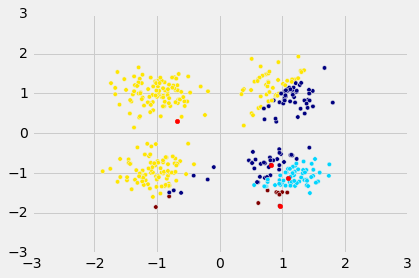

In [282]:
guessed_means = np.array([X[np.random.randint(0, len(X))] for i in range(K)])
labels = np.array([nearest_mean(p, guessed_means) for p in X])

plt.axis([-3,3,-3,3])

plt.scatter(X[:,0], X[:,1], c=labels)

plt.scatter(guessed_means[:,0], guessed_means[:,1], color="red", s=20)

### Loop

In [283]:
prev_means = np.array([1])
while ((prev_means != guessed_means).any()):
    prev_means = guessed_means.copy()
    guessed_means = np.array([np.mean(X[labels == l], axis=0) for l in range(len(guessed_means))])
    labels = np.array([nearest_mean(p, guessed_means) for p in X])

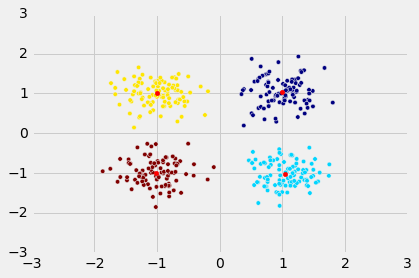

In [284]:
labels = np.array([nearest_mean(p, guessed_means) for p in X])

plt.axis([-3,3,-3,3])

plt.scatter(X[:,0], X[:,1], c=labels)

plt.scatter(guessed_means[:,0], guessed_means[:,1], color="red", s=20)